In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tools.eval_measures import rmse, meanabs
from statsmodels.tsa.arima.model import ARIMA

In [141]:
df = pd.read_csv("wind/wind_speed_raw.csv", index_col=0)
df["date"] = pd.to_datetime(df["date"])
df

,date,lon,lat,u,v,windvelo
0,2007-01-01,116.5,21.50,-8.257035,-8.363728,11.752896
1,2007-01-01,116.5,21.25,-8.253843,-8.440760,11.805607
2,2007-01-01,116.5,21.00,-8.257744,-8.500746,11.851288
3,2007-01-01,116.5,20.75,-8.290377,-8.566961,11.921542
4,2007-01-01,116.5,20.50,-8.343582,-8.631209,12.004713
...,...,...,...,...,...,...
536755,2020-12-01,127.5,5.00,-0.639788,-1.543960,1.671269
536756,2020-12-01,127.5,4.75,-0.479817,-1.541665,1.614607
536757,2020-12-01,127.5,4.50,-0.296790,-1.533798,1.562249
536758,2020-12-01,127.5,4.25,-0.096029,-1.499708,1.502779


In [142]:
m_df = df.groupby(["lat", "lon"])[["windvelo"]].mean().reset_index()
m_df

,lat,lon,windvelo
0,4.0,116.50,0.338913
1,4.0,116.75,0.286588
2,4.0,117.00,0.225665
3,4.0,117.25,0.362051
4,4.0,117.50,0.607744
...,...,...,...
3190,21.5,126.50,5.570037
3191,21.5,126.75,5.548037
3192,21.5,127.00,5.508153
3193,21.5,127.25,5.490218


In [143]:
target_df = m_df[(m_df["windvelo"] == m_df["windvelo"].max()) \
                 | (m_df["windvelo"] == m_df["windvelo"].min())].reset_index(drop=True)
target_df

,lat,lon,windvelo
0,4.00,117.00,0.225665
1,18.75,120.25,7.578876


In [144]:
maxv_df = df[(df.lon == target_df[1:2].lon.values[0]) \
             & (df.lat == target_df[1:2].lat.values[0])].set_index("date", drop=True)
maxv_df

,lon,lat,u,v,windvelo
date,,,,,
2007-01-01,120.25,18.75,-11.911895,-6.479564,13.560162
2007-02-01,120.25,18.75,-8.419844,-3.683476,9.190308
2007-03-01,120.25,18.75,-6.876886,-3.236692,7.600508
2007-04-01,120.25,18.75,-6.135911,-3.212435,6.925976
2007-05-01,120.25,18.75,-1.594294,0.674227,1.730998
...,...,...,...,...,...
2020-08-01,120.25,18.75,0.084161,4.066574,4.067444
2020-09-01,120.25,18.75,-2.309021,-0.705133,2.414289
2020-10-01,120.25,18.75,-11.757953,-5.507325,12.983840


In [145]:
minv_df = df[(df.lon == target_df[0:1].lon.values[0]) \
             & (df.lat == target_df[0:1].lat.values[0])].set_index("date", drop=True)
minv_df

,lon,lat,u,v,windvelo
date,,,,,
2007-01-01,117.0,4.0,0.027053,-0.169189,0.171338
2007-02-01,117.0,4.0,-0.380855,-0.173778,0.418628
2007-03-01,117.0,4.0,-0.421646,-0.042333,0.423766
2007-04-01,117.0,4.0,-0.310979,-0.010209,0.311146
2007-05-01,117.0,4.0,-0.087516,0.131399,0.157875
...,...,...,...,...,...
2020-08-01,117.0,4.0,-0.062332,0.124187,0.138952
2020-09-01,117.0,4.0,-0.044597,0.088130,0.098771
2020-10-01,117.0,4.0,0.161131,0.043550,0.166913


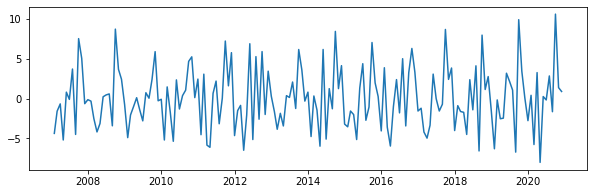

In [146]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)

plt.plot(maxv_df["windvelo"].interpolate().diff()[1:])

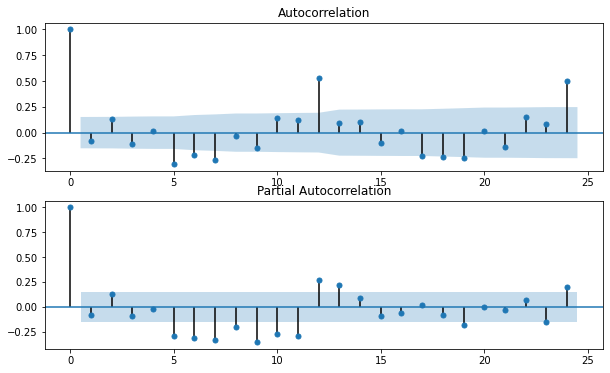

In [147]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

acf = plot_acf(maxv_df["windvelo"].interpolate().diff()[1:], lags=24, ax=ax1)
pacf = plot_pacf(maxv_df["windvelo"].interpolate().diff()[1:], lags=24, ax=ax2)

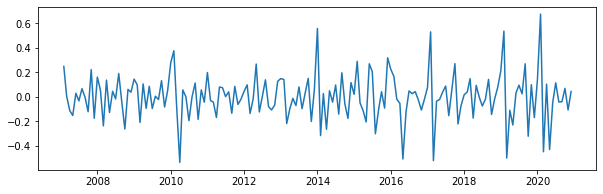

In [148]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)

plt.plot(minv_df["windvelo"].interpolate().diff()[1:])

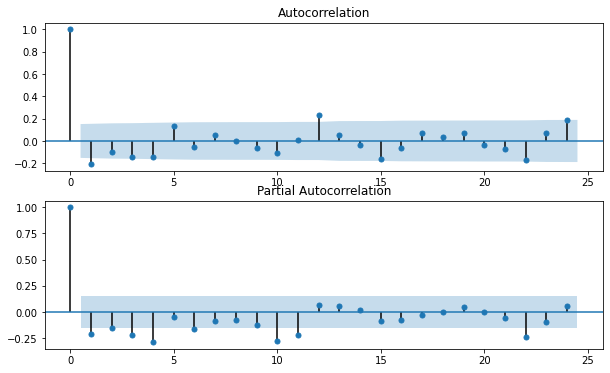

In [149]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

acf = plot_acf(minv_df["windvelo"].interpolate().diff()[1:], lags=24, ax=ax1)
pacf = plot_pacf(minv_df["windvelo"].interpolate().diff()[1:], lags=24, ax=ax2)

In [150]:
maxv_train_df = maxv_df["2007-01-01":"2017-12-01"]
maxv_test_df = maxv_df["2018-01-01":]
minv_train_df = minv_df["2007-01-01":"2017-12-01"]
minv_test_df = minv_df["2018-01-01":]

In [151]:
len(maxv_train_df), len(maxv_test_df), len(minv_train_df), len(minv_test_df)

(132, 36, 132, 36)

In [152]:
def plot_original(train_df, test_df, feature):
    fig = plt.figure(figsize=(10,3))
    ax = fig.add_subplot(111)

    train_df[feature].plot(color="C7", ax=ax, label="train")
    test_df[feature].plot(color="C0", ax=ax, label="test")

    plt.legend()
    plt.ylabel("wind velocity at a sector")

In [153]:
def get_naive_forecast(df, start_date):
    return df.shift(1)[start_date:]

In [164]:
def get_windowed_forecast(df, start_date, roll_value=12):
    return df.rolling(roll_value).mean().shift(1)[start_date:]

In [176]:
def get_ema_forecast(df, start_date, alpha=0.7):
    # alpha = 1 is similar to naive
    return df.ewm(alpha=alpha).mean().shift(1)[start_date:]

In [199]:
def get_arima_fit(train_df, feature, order):
    model = ARIMA(endog=train_df[feature], order=order)  
    return model.fit()

In [200]:
def get_arima_forecast(model_fit, test_count, feature):
    return pd.DataFrame(model_fit.forecast(test_count, dynamic=True))\
                .rename(columns={"predicted_mean": feature})

In [154]:
def plot_forecast(train_df, test_df, forecast_df, feature):
    fig = plt.figure(figsize=(10,3))
    ax = fig.add_subplot(111)

    train_df[feature].plot(color="C7", ax=ax, label="train")
    test_df[feature].plot(color="C0", ax=ax, label="test")

    forecast_df[feature].plot(color="C1", ax=ax, label="forecast")

    plt.legend()
    plt.ylabel("wind velocity at a sector")

    print("The RMSE is %0.2f" % rmse(test_df[feature], forecast_df[feature]))
    print("The MAE is %0.2f" % meanabs(test_df[feature], forecast_df[feature]))

### Sector with Maximum Average Wind Velocity

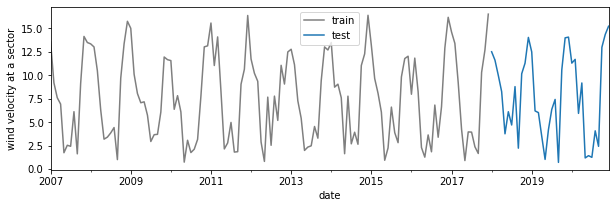

In [155]:
plot_original(maxv_train_df, maxv_test_df, "windvelo")

The RMSE is 4.24
The MAE is 3.23


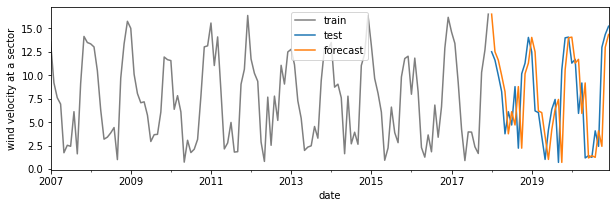

In [157]:
plot_forecast(maxv_train_df, maxv_test_df, get_naive_forecast(maxv_df, "2018-01-01"), "windvelo")

The RMSE is 4.58
The MAE is 4.02


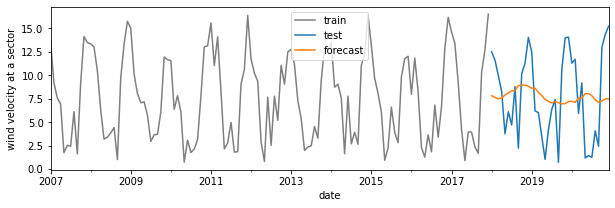

In [166]:
plot_forecast(maxv_train_df, maxv_test_df, get_windowed_forecast(maxv_df, "2018-01-01"), "windvelo") # yearly

The RMSE is 4.72
The MAE is 4.05


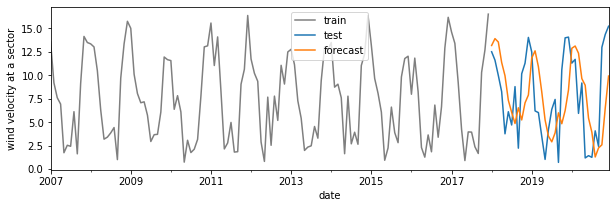

In [167]:
plot_forecast(maxv_train_df, maxv_test_df, get_windowed_forecast(maxv_df, "2018-01-01", 3), "windvelo") # quarterly

The RMSE is 4.15
The MAE is 3.41


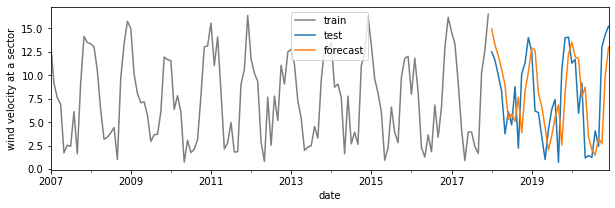

In [170]:
plot_forecast(maxv_train_df, maxv_test_df, get_ema_forecast(maxv_df, "2018-01-01"), "windvelo")

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum L

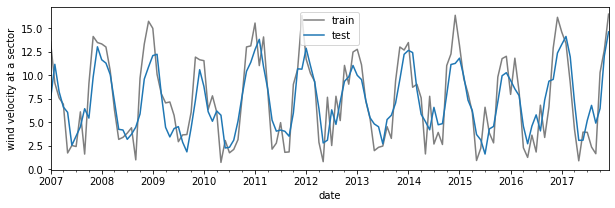

In [222]:
model_fit = get_arima_fit(maxv_train_df, "windvelo", (1, 0, 12))
fitted_df = pd.DataFrame(model_fit.fittedvalues).rename(columns={0: "windvelo"})
plot_original(maxv_train_df, fitted_df, "windvelo")

The RMSE is 4.36
The MAE is 3.78


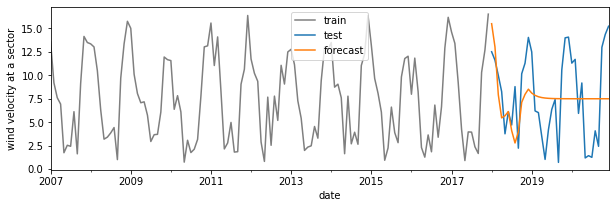

In [223]:
plot_forecast(maxv_train_df, maxv_test_df, get_arima_forecast(model_fit, len(maxv_test_df), "windvelo"), "windvelo")

### Sector with Minimum Average Wind Velocity

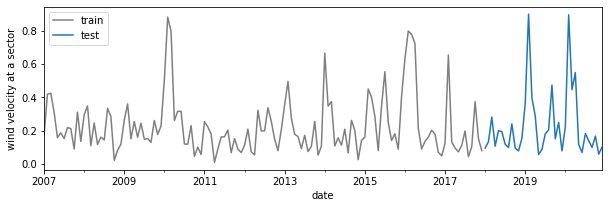

In [158]:
plot_original(minv_train_df, minv_test_df, "windvelo")

The RMSE is 0.23
The MAE is 0.16


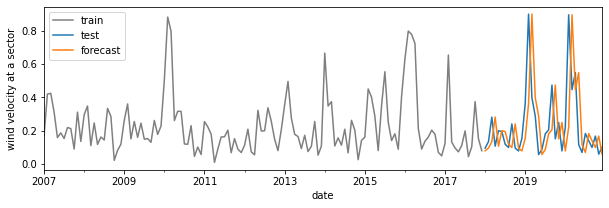

In [160]:
plot_forecast(minv_train_df, minv_test_df, get_naive_forecast(minv_df, "2018-01-01"), "windvelo")

The RMSE is 0.21
The MAE is 0.15


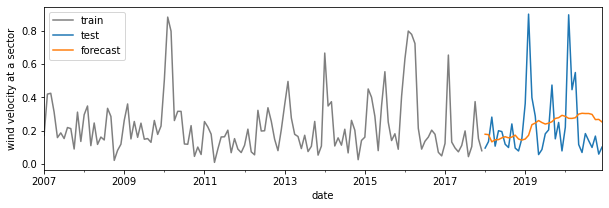

In [163]:
plot_forecast(minv_train_df, minv_test_df, get_windowed_forecast(minv_df, "2018-01-01"), "windvelo") # yearly

The RMSE is 0.24
The MAE is 0.15


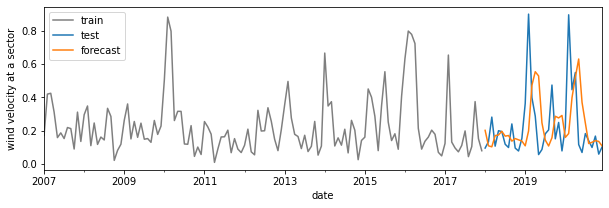

In [168]:
plot_forecast(minv_train_df, minv_test_df, get_windowed_forecast(minv_df, "2018-01-01", 3), "windvelo") # quarterly

The RMSE is 0.22
The MAE is 0.15


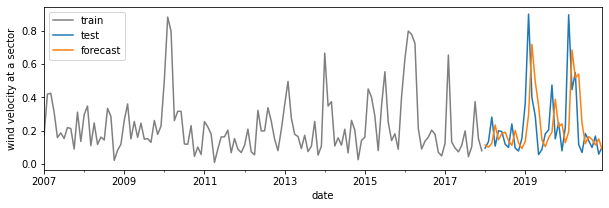

In [175]:
plot_forecast(minv_train_df, minv_test_df, get_ema_forecast(minv_df, "2018-01-01"), "windvelo")

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


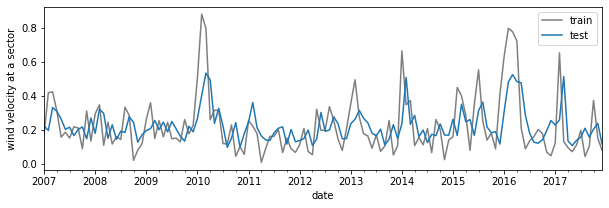

In [224]:
model_fit = get_arima_fit(minv_train_df, "windvelo", (1, 0, 12))
fitted_df = pd.DataFrame(model_fit.fittedvalues).rename(columns={0: "windvelo"})
plot_original(minv_train_df, fitted_df, "windvelo")

The RMSE is 0.20
The MAE is 0.14


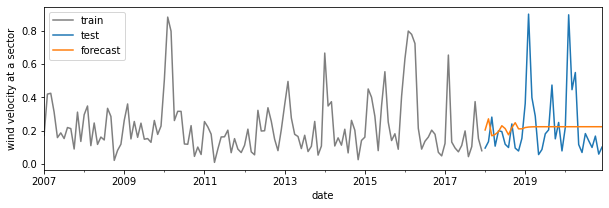

In [225]:
plot_forecast(minv_train_df, minv_test_df, get_arima_forecast(model_fit, len(minv_test_df), "windvelo"), "windvelo")